## DATA INCUBATOR CAPSTONE IDEA

#### NEURAL NETWORK TRAINING WITH TENSOR FLOW

####  Submitted by :

* Sri Charitha Velamuri

* Tensor Flow is an open source machine learning package. 
* This library helps develop and train machine learning model.
* The business firm that is used for this project is Macy's 
* The goal of this project to train a neural network model for the classification of clothing images like sneakers and shirts. 


In [1]:
from __future__ import absolute_import, division, print_function



# importing tensor flow and tensor flow keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


* The data set we  have used  in this project is FASHION MNIST dataset which contains around 70,000 grayscale images into 10 categories.  
* The images are at a low resolution of 28 * 28 pixels. 
* We  have used 60,000 images as the training data and 10,000 images as the testing data, for classifying the images. 

In [3]:
#Loading the data 

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* The train images and test images are 28 * 28 Numpy arrays with their pixel values ranging from 0 to 255.
* The training and test labels are an array of integers, ranging from 0 to 9. 
* Each image is mapped to a label,the class names are not included in the data set, hence we store them there to use later when plotting the images.

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#Exploring the data
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
(10000, 28, 28)

(10000, 28, 28)

In [10]:
len(test_labels)

10000

* The data has to be preprocessed before training the data.  Hence we plot a graph and can observe that the pixel values range from 0 to 255

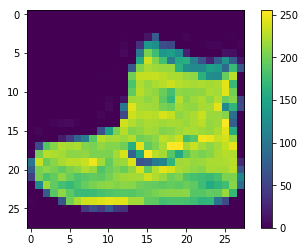

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

* We have to scale the values to a range of 0 to 1 before we feed them to the neural network model.
* For this, we have to divide the values by 255. It's important that we do this for training data and the testing data in the same way. 

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

* Then, we display the first 10 images of the training data and their labels under the images, to ensure that the data is in correct format before building the model.

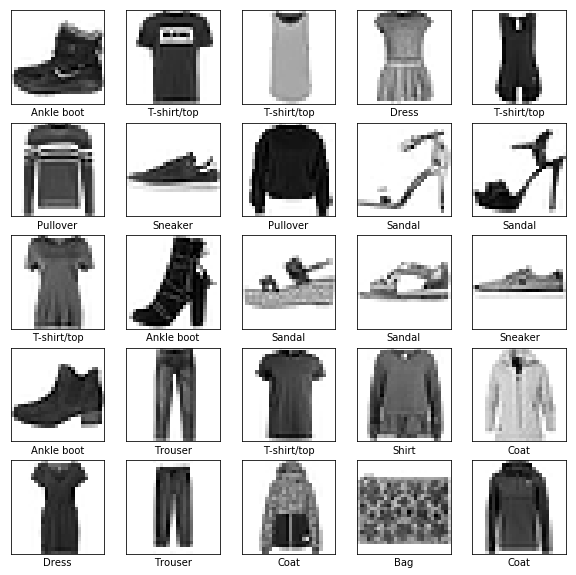

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

* The basic building block of a neural network is called a layer. 
* They extract representations from the data that was fed into them.  
* Most of the deep learning comprise of chaining the simple layers together. 
* The layers such as tf.keras.layers.Dense consist of parameters that they learn during training.

To build a neural network, the following steps are required:
1. Configuring the layers 
2. Compiling the model

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


* Compiling the Model:
  There is a need for few more settings before training the model. These are added at the model's compilation step. 
 
* Loss Function:
  This is a measure of accuracy of the model at the time of training.

* Optimizer:
  The model is updated based on the data that is observes and its loss function. 

* Metrics:
  This is used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly     classified.

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Training the model:
This requires the following steps.
1. Feeding the training data to the model-in , that is the train images and train label arrays.
2. Learning to associate the images and labels 
3. Predicting and verifying the predictions if they match the labels from the test labels arrays.

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 17s 288us/sample - loss: 0.5039 - acc: 0.8229
Epoch 2/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3743 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.3383 - acc: 0.8759
Epoch 4/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3126 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2965 - acc: 0.8899


In [17]:
#Evaluating the accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 328us/sample - loss: 0.3493 - acc: 0.8742
Test accuracy: 0.8742


In [18]:
#Make predictions
predictions = model.predict(test_images)

In [19]:

predictions[0]

array([1.74226880e-05, 3.61512709e-10, 1.57706637e-07, 2.62861562e-07,
       1.17666821e-06, 9.89583880e-03, 4.43929775e-06, 1.03656806e-01,
       3.12606608e-05, 8.86392653e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [23]:
#Observing the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

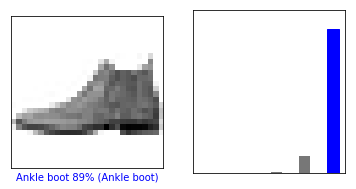

In [24]:
#Plotting the 0th image and label array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

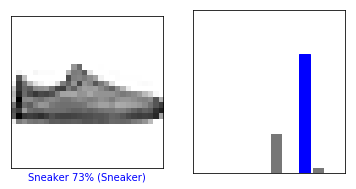

In [25]:
#Plotting the 12th image and label array
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

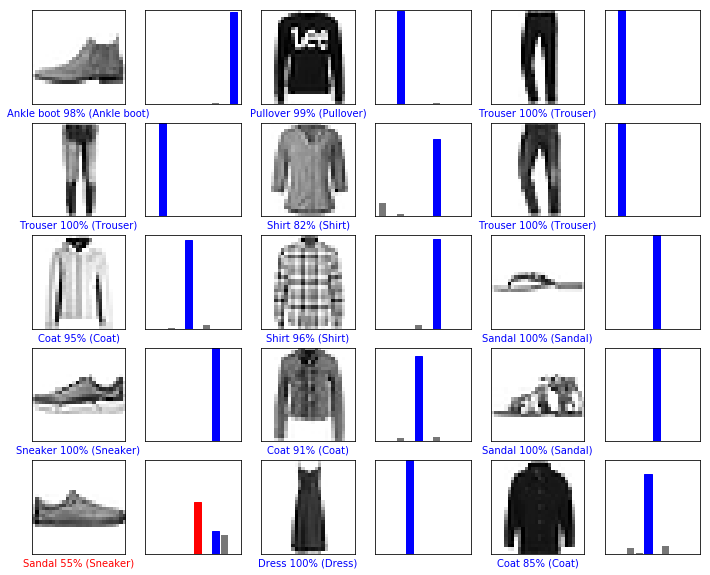

In [25]:
# Plotting the first X test images, their predicted label, and the true label
# Coloring correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
# Grabbing an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [27]:
# Addding the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
#Making the prediction

predictions_single = model.predict(img)

print(predictions_single)

[[1.74227043e-05 3.61513347e-10 1.57706765e-07 2.62861278e-07
  1.17666798e-06 9.89583787e-03 4.43930548e-06 1.03656866e-01
  3.12606862e-05 8.86392534e-01]]


* The model.predict command returns a list of lists, one for each image in the batch of data. Therefore, the predictions for our (only) image in the batch are grabbed.

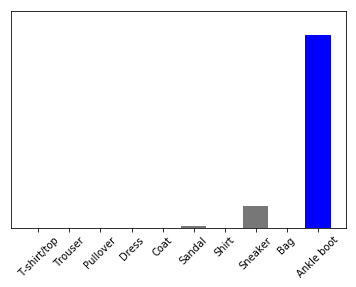

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

9

### Conclusion: 

* One of the major applications of these neural networks is that they help machines in recognizing images and making them meaningful in a certain manner that is a intuitive to humans. 
* This could mean that having a computer that will recognize the coloured dots in a image when combined becomes a cake. 
* In order to check accuracy, an Artificial Intelligence can be trained to identify the availability of correct answers. 
* The neural network will identify the image and will check for accuracy, and then will enhance its potential of making sense of the coloured clusters. 

The neural networks have a wide range of applications such as :

1. Image classification for business applications. 
2. Medical Diagnosis to match patient image data with known visual symptoms for medical coonditions. 
3. Line sensors for sports to judge in-out based on high resolution image data  
4. Risk assessment for insurance or for a credit card applications